In [7]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [8]:
!dir "C:\Users\kirti\Downloads\AmazonReviewData"

Volume in drive C is Local Disk
 Volume Serial Number is 8471-B1A1

 Directory of C:\Users\kirti\Downloads\AmazonReviewData

08/17/2020  06:10 PM    <DIR>          .
08/17/2020  06:10 PM    <DIR>          ..
08/17/2020  06:10 PM       698,828,243 amazon_reviews_us_Electronics_v1_00.tsv.gz
               1 File(s)    698,828,243 bytes
               2 Dir(s)  12,549,308,416 bytes free


## Dataset

Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazon’s iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website.

The data is available in TSV files in the amazon-reviews-pds S3 bucket in AWS US East Region. Each line in the data files corresponds to an individual review (tab delimited, with no quote and escape characters)

### DATA COLUMNS:


| Column Name | Description |
| ------------| --------|
| marketplace | 2 letter country code of the marketplace where the review was written.|
| customer_id |Random identifier that can be used to aggregate reviews written by a single author.|
| review_id   | The unique ID of the review.|
| product_id  | The unique Product ID the review pertains to. In the multilingual dataset the reviews.for the same product in different countries can be grouped by the same product_id.|
| product_parent | Random identifier that can be used to aggregate reviews for the same product.|
| product_title  | Title of the product.|
| product_category |Broad product category that can be used to group reviews.|
                    (also used to group the dataset into coherent parts).
| star_rating |The 1-5 star rating of the review.|
| helpful_votes |Number of helpful votes.|
| total_votes |  Number of total votes the review received.|
| vine | Review was written as part of the Vine program.|
| verified_purchase| The review is on a verified purchase.|
| review_headline | The title of the review.|
| review_body | The review text.|
| review_date |The date the review was written.|



### DATA FORMAT
Tab ('\t') separated text file, without quote or escape characters.
First line in each file is header; 1 line corresponds to 1 record.

### US REVIEWS DATASET
**Electronics Category** : https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz

In [6]:
DATA_HOME="C:/Users/kirti/Downloads/AmazonReviewData/"
df_electronics = pd.read_csv(DATA_HOME +'amazon_reviews_us_Electronics_v1_00.tsv.gz', sep="\t", header=0, error_bad_lines=False)

NameError: name 'pd' is not defined

In [4]:
df_electronics.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


In [5]:
df_electronics['review_date'] = pd.to_datetime(df_electronics.review_date)

In [6]:
df_electronics.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


In [7]:
df_electronics.dtypes

marketplace                  object
customer_id                   int64
review_id                    object
product_id                   object
product_parent                int64
product_title                object
product_category             object
star_rating                   int64
helpful_votes                 int64
total_votes                   int64
vine                         object
verified_purchase            object
review_headline              object
review_body                  object
review_date          datetime64[ns]
dtype: object

## Monthly Trend of Review


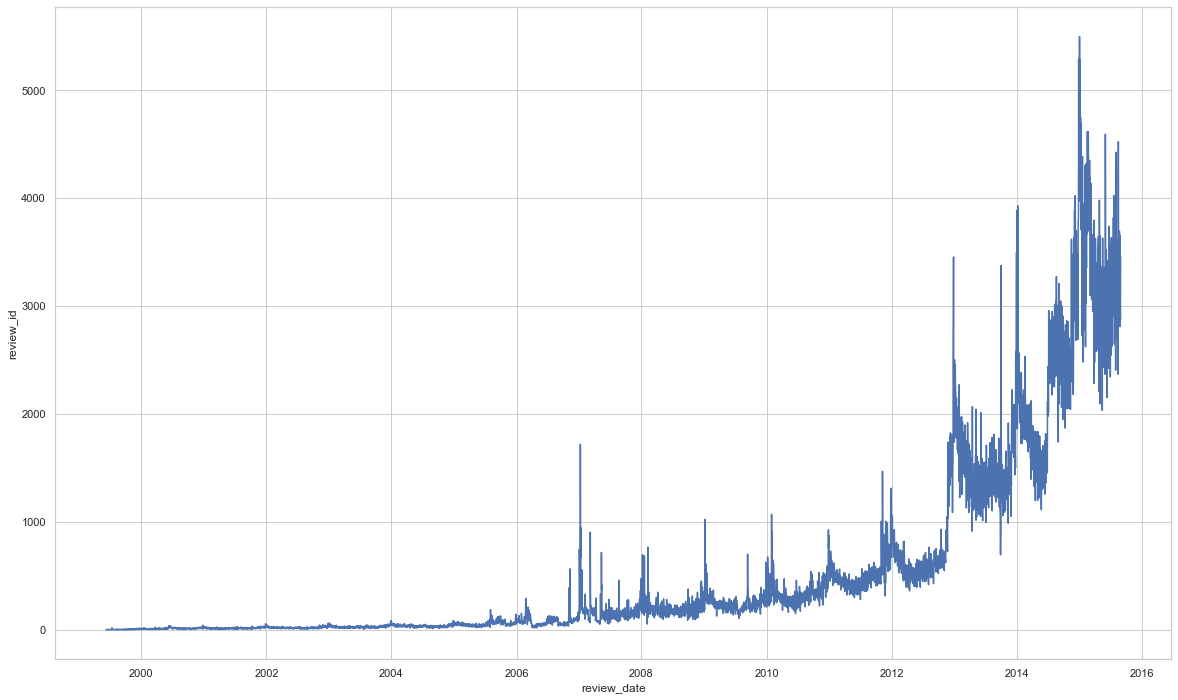

In [8]:
df_review_trend = df_electronics.groupby(['review_date'])['review_id'].count().reset_index()

f, ax = plt.subplots(figsize=(20, 12))

ax = sns.lineplot(x="review_date", y="review_id",
                  markers=True, dashes=False, data=df_review_trend)

## Count Per Review

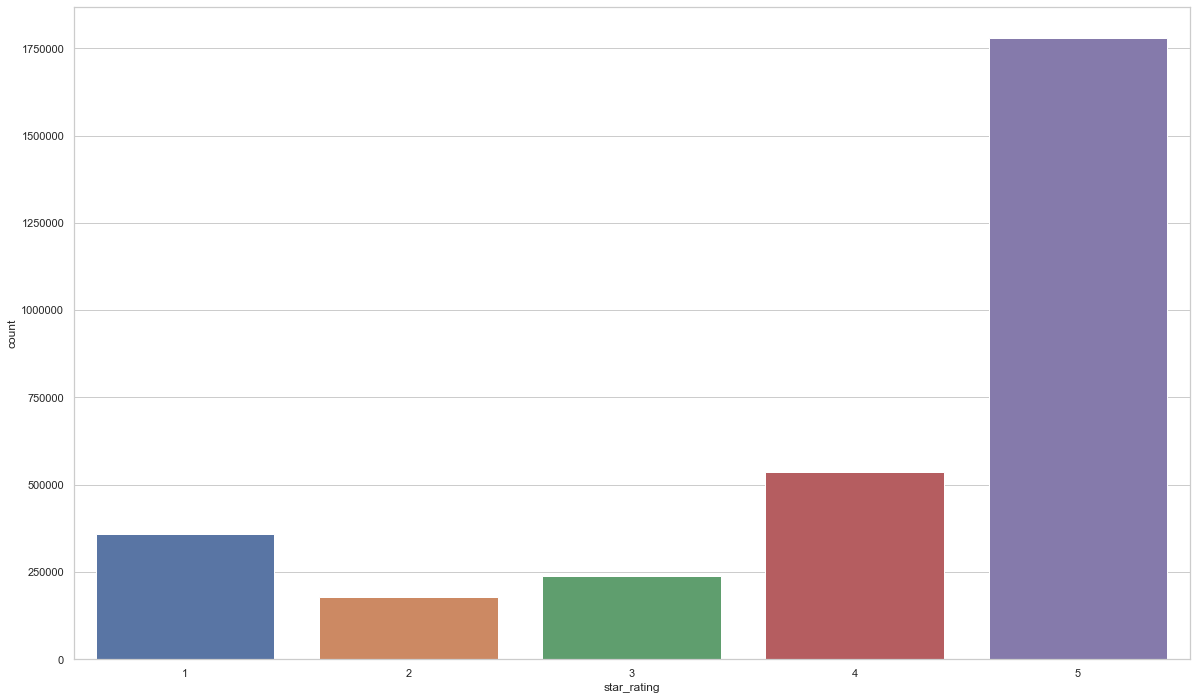

In [9]:
df_star_rating = df_electronics.groupby(['star_rating'])['review_id'].count()
df_star_rating = df_star_rating.to_frame(name='count').sort_values(by='count', ascending=False).reset_index()

f, ax = plt.subplots(figsize=(20, 12))

ax = sns.barplot(x="star_rating", y="count",data=df_star_rating)

## Data Preparation

### Check and Replace Null values

In [10]:
df_reviews = df_electronics[['customer_id','star_rating','review_headline','review_body']]
df_reviews.isnull().sum()

customer_id         0
star_rating         0
review_headline    31
review_body        88
dtype: int64

In [11]:
df_reviews = df_reviews.dropna()
df_reviews.isnull().sum()

customer_id        0
star_rating        0
review_headline    0
review_body        0
dtype: int64

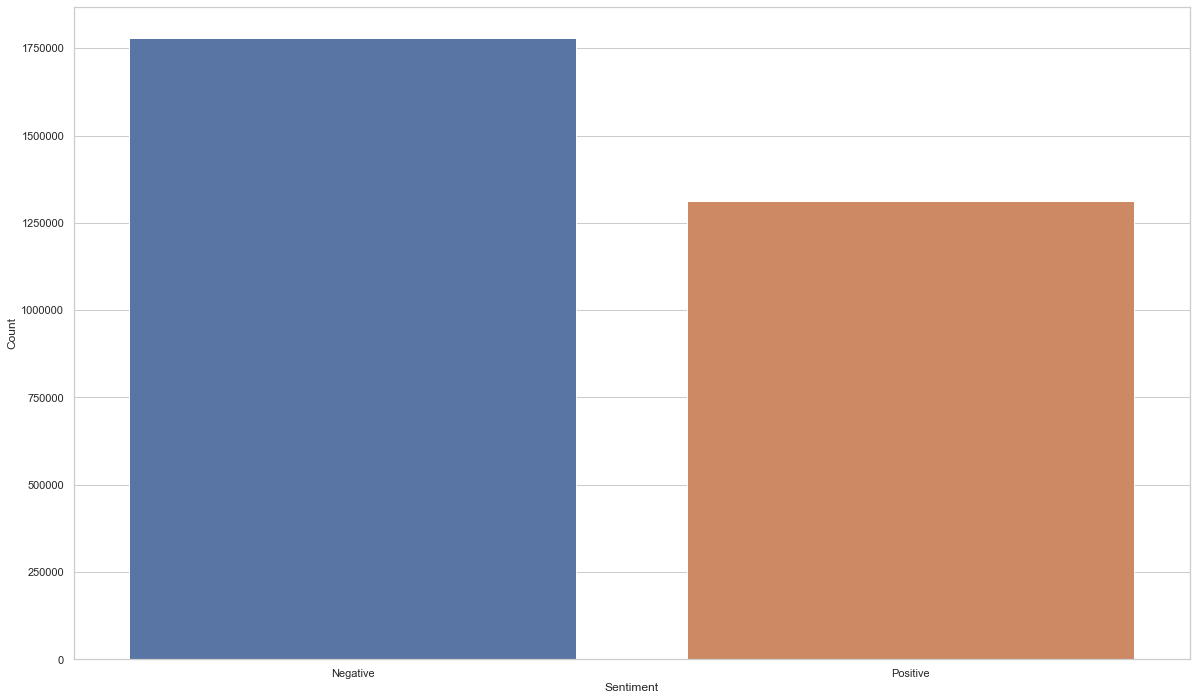

In [12]:
df_reviews['sentiment'] = df_reviews['star_rating'].apply(lambda x: 'Positive' if x <= 4 else 'Negative')

df_sentiments = df_reviews['sentiment'].value_counts().reset_index(name='Count').rename(columns={'index': 'Sentiment'})

f, ax = plt.subplots(figsize=(20, 12))

ax = sns.barplot(x="Sentiment", y="Count",data=df_sentiments)

### NLTK Work

- Cleanup - lowercase , remove special chars
- remove stop words
- Tokenizer
- Train, Test data, Fewature extraction
- Visualization (Wordcloud, word frequency)
- Final Conclusion